In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn import tree

In [0]:
boston = load_boston()
X = boston.data
Y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 3)                                   

In [7]:
regTree = DecisionTreeRegressor(criterion = 'mse',
                                max_depth = None,
                                min_samples_leaf = 2,
                                random_state = 3)

regTree.fit(X_train, y_train)
regTree_train_score = regTree.score(X_train, y_train)
regTree_test_score = regTree.score(X_test, y_test)
print('For the first regression tree train performance: ', regTree_train_score)
print('For the first regression tree test performance: ', regTree_test_score)

For the first regression tree train performance:  0.9908722156863008
For the first regression tree test performance:  0.7233975341357604


[Text(535.6800000000001, 440.31600000000003, 'X[12] <= 9.725\nmse = 86.866\nsamples = 100.0%\nvalue = 22.629'),
 Text(245.52, 342.468, 'X[5] <= 7.435\nmse = 76.794\nsamples = 41.8%\nvalue = 30.096'),
 Text(89.28, 244.62, 'X[7] <= 1.485\nmse = 44.155\nsamples = 35.9%\nvalue = 27.655'),
 Text(44.64, 146.772, 'mse = 0.0\nsamples = 1.4%\nvalue = 50.0'),
 Text(133.92000000000002, 146.772, 'X[5] <= 6.594\nmse = 24.663\nsamples = 34.5%\nvalue = 26.739'),
 Text(89.28, 48.924000000000035, '\n  (...)  \n'),
 Text(178.56, 48.924000000000035, '\n  (...)  \n'),
 Text(401.76, 244.62, 'X[10] <= 15.4\nmse = 20.26\nsamples = 5.9%\nvalue = 44.857'),
 Text(312.48, 146.772, 'X[5] <= 7.724\nmse = 9.371\nsamples = 3.1%\nvalue = 47.582'),
 Text(267.84000000000003, 48.924000000000035, '\n  (...)  \n'),
 Text(357.12, 48.924000000000035, '\n  (...)  \n'),
 Text(491.04, 146.772, 'X[11] <= 382.43\nmse = 15.088\nsamples = 2.8%\nvalue = 41.86'),
 Text(446.4, 48.924000000000035, '\n  (...)  \n'),
 Text(535.680000000

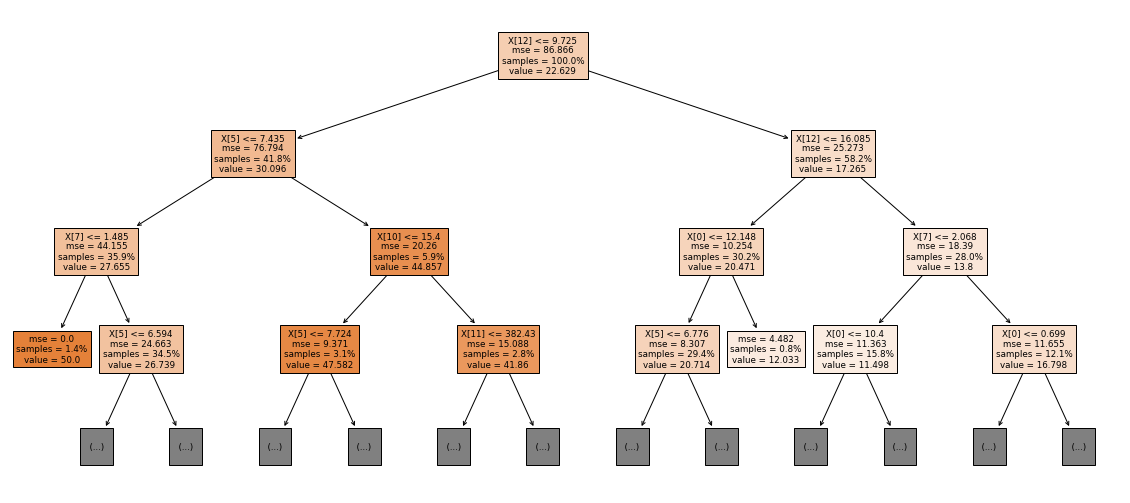

In [8]:
fig = plt.figure(figsize = (20, 9))
tree.plot_tree(regTree)
tree.plot_tree(regTree, max_depth = 3, filled=True, proportion = True)

In [0]:
regTree2 = DecisionTreeRegressor(criterion = 'mse',
                                max_depth = None,
                                min_samples_leaf = 10,
                                random_state = 3)

regTree2.fit(X_train, y_train)
regTree2_train_score = regTree2.score(X_train, y_train)
regTree2_test_score = regTree2.score(X_test, y_test)
print('For the second regression tree train performance: ', regTree2_train_score)
print('For the second regression tree test performance: ', regTree2_test_score)

For the second regression tree train performance:  0.8960769665363927
For the second regression tree test performance:  0.756410948570213


In [9]:
regTree3 = DecisionTreeRegressor(criterion = 'mse',
                                max_depth = 3,
                                min_samples_leaf = 2,
                                random_state = 3)

regTree3.fit(X_train, y_train)
regTree3_train_score = regTree3.score(X_train, y_train)
regTree3_test_score = regTree3.score(X_test, y_test)
print('Regression tree 3 train performance: ', regTree3_train_score)
print('Regression tree 3 test performance: ', regTree3_test_score)

Regression tree 3 train performance:  0.8283697052019909
Regression tree 3 test performance:  0.6726498125448512


In [10]:
# Definition of alpha hyperparameter with cross validation
hyperparameters = np.linspace(0, 3, 50)
cv = KFold(n_splits = 5,
           shuffle = True,
           random_state = 3)

hyperparameter_accuracy = []
for c in hyperparameters:
    cv_accuracy = []
    for train_index, ver_index in cv.split(X_train, y_train):
        tree = DecisionTreeRegressor(criterion = "mse",
                                     ccp_alpha = c,
                                     random_state = 3)
        tree.fit(X_train[train_index], y_train[train_index])
        accuracy = tree.score(X_train[ver_index], y_train[ver_index])
        cv_accuracy.append(accuracy)
    cv_accuracy = np.array(cv_accuracy)
    hyperparameter_accuracy.append(cv_accuracy.mean())

best_alpha = hyperparameters[np.argmax(hyperparameter_accuracy)]
print(best_alpha)

0.18367346938775508


In [11]:
tree = DecisionTreeRegressor(criterion = "mse",
                             ccp_alpha = best_alpha,
                             random_state = 3).fit(X_train, y_train)
accuracy = tree.score(X_test, y_test)
print(accuracy)

0.7656057886859067


In [12]:
# Recursive feature elimination (Similar to backward stepwise)
predictor = LinearRegression()
feature = RFE(predictor,
              n_features_to_select = 7,
              step = 1)
feature.fit(X_train, y_train)
boston.feature_names[feature.get_support()]
feature_train_performance = feature.score(X_train, y_train)
feature_test_performance = feature.score(X_test, y_test)
print("The accuracy of the predictions with training data: ", feature_train_performance)
print("The accuracy of the predictions with test data: ", feature_test_performance)

The accuracy of the predictions with training data:  0.7121959999063349
The accuracy of the predictions with test data:  0.7106437332694668
